## Строим траекторию движения тела

Начальные данные - скорость и угол броска. По формулам, описывающим баллистическое движение в поле тяжести без учёта сопротивления воздуха, строим график (параболу) и находим остальные данные.
 

 Формулы:
$$ x(t) = x_{0} + v_{x} t$$ 
$$ y(t) = y_{0} + v_{y} t - \frac{g t^2}{2}$$
$$ v_{к} = v_{0} - a t $$
$$ v_{x} = v_{0} cos (\alpha) $$
$$ v_{y} = v_{0} sin (\alpha) $$




<IPython.core.display.Javascript object>


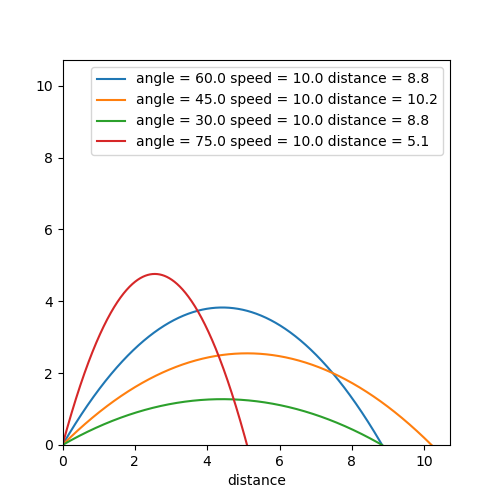

Button(button_style='warning', description='Clear', style=ButtonStyle())

Button(button_style='success', description='Record', style=ButtonStyle())

interactive(children=(FloatSlider(value=45.0, description='angle (°):', max=90.0, min=0.1), FloatSlider(value=10.0, description='V (m/sec):', max=200.0, min=0.1), Output()), _dom_classes=('widget-interact',))

angle 75.0 speed 10.0 distance 5.1 highest 4.8


In [169]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
import numpy as np
#from IPython.display import display
global A,S,Distance,H
fig,ax = plt.subplots(1, figsize=(5,5))



def update_XY_np(angle, v):
    global A,S,Distance,H 
    g = 9.8
    t = 2 * v * np.sin(angle*math.pi/180) / g
    T = np.linspace(0,t,1000) 
    X = v*np.cos(angle*math.pi/180)*T
    Y = v*np.sin(angle*math.pi/180)*T - (g*T**2)/2
    A,S,Distance,H = angle,v,max(X),max(Y)
    return X,Y


def update_plot(angle, v):
    #ax.clear()
    X,Y = update_XY_np(angle, v)
     
    #ax.scatter(X, Y,s=5)  
    ax.plot(X, Y, label = "angle = {:.1f} speed = {:.1f} distance = {:.1f}".format(angle,v,X[-1]))   
    ax.set_ylim(0, max(max(X),max(Y))*1.05)
    ax.set_xlim(0, max(max(X),max(Y))*1.05)
    ax.legend(loc=1)
    ax.set_xlabel('distance')
    plt.show()

    


def on_button_clicked(b): # Описываем обработчик события
    ax.clear()
    

def on_button_clicked2(b): # Описываем обработчик события
    print('angle {:.1f} speed {:.1f} distance {:.1f} highest {:.1f}'.format(A,S,Distance,H ))
    
    
    
button1 = widgets.Button(description="Clear", button_style='warning') # 'success', 'info', 'warning', 'danger', '')                       )
button2 = widgets.Button(description="Record", button_style='success') # 'success', 'info', 'warning', 'danger', '')                        ) 
button1.on_click(on_button_clicked) # Назначаем этот обработчик на событие "on_click"
button2.on_click(on_button_clicked2)
display(button1,button2) # Отображаем кнопку
                         
angle = widgets.FloatSlider(min=0.1, max=90, value=45, description='angle (°):')
v = widgets.FloatSlider(min=0.1, max=200, value=10, description='V (m/sec):')
widgets.interactive(update_plot, angle=angle, v=v)
